We first define `g1` and `g2`, two labelled quotient graphs using the `MultiGraph` class in `networkx`.
Note `g1` and `g2` represent 2 different nets.

In [21]:
import networkx as nx
g1 = nx.MultiGraph()
g1.add_node(0, symbol="A")
g1.add_node(1, symbol="B")
g1.add_node(2, symbol="C")
g1.add_node(3, symbol="C")
g1.add_edge(0, 1, direction=(0, 1), voltage=(0, 0, 0))
g1.add_edge(1, 2, direction=(1, 2), voltage=(0, 0, 0))
g1.add_edge(0, 2, direction=(0, 2), voltage=(0, 1, 0))
g1.add_edge(0, 3, direction=(0, 3), voltage=(0, 0, 0))
g1.add_edge(2, 3, direction=(2, 3), voltage=(0, 0, 0))
g1.add_edge(3, 1, direction=(3, 1), voltage=(1, 0, 0))

g2 = nx.MultiGraph()
g2.add_node(0, symbol="A")
g2.add_node(1, symbol="B")
g2.add_node(2, symbol="C")
g2.add_node(3, symbol="C")
g2.add_edge(0, 1, direction=(0, 1), voltage=(0, 0, 0))
g2.add_edge(1, 2, direction=(1, 2), voltage=(0, 0, 0))
g2.add_edge(0, 2, direction=(0, 2), voltage=(0, 0, 0))
g2.add_edge(0, 3, direction=(0, 3), voltage=(0, 0, 0))
g2.add_edge(2, 3, direction=(3, 2), voltage=(1, 0, 0))
g2.add_edge(3, 1, direction=(1, 3), voltage=(0, 1, 0))

0

Init the `LQG` object from a `MultiGraph`.

In [22]:
from cqgraph.qgraph import LQG
lqg1 = LQG(g1)
lqg2 = LQG(g2)

Now we can visualize them.

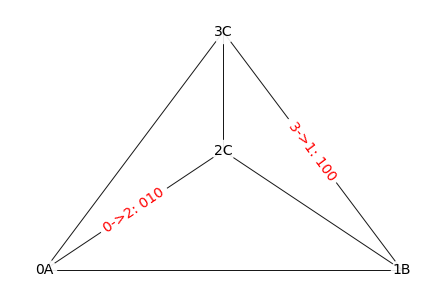

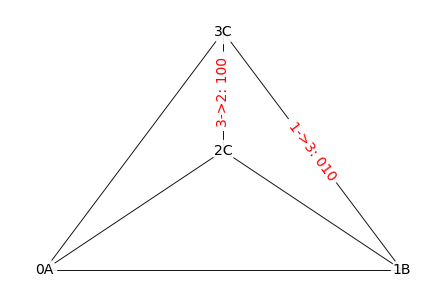

In [23]:
fig1, lqg1_positions = lqg1.draw(1)
fig2, lqg2_positions = lqg2.draw(2, lqg1_positions)

They are not equivalent to each other if you unfold them to nets.
But you can also know this by checking cycle voltages.

In [24]:
import logging
logging.basicConfig(level=logging.DEBUG)  # show cycle voltage checking
print(lqg1.is_equivalent(lqg2))  # same as lqg1 == lqg2

logger = logging.getLogger()  # turn off logging
logger.setLevel(logging.CRITICAL)

False


Equivalent LQGs, as defined in [Chung1984](https://doi.org/10.1107/S0108767384000088), can come from reverse directions and signs of edge labels.
In this case (Fig 3b) there are 4 equivalent LQGs of `lqg1`, they represent the same net.

True True
True False
True False
True False


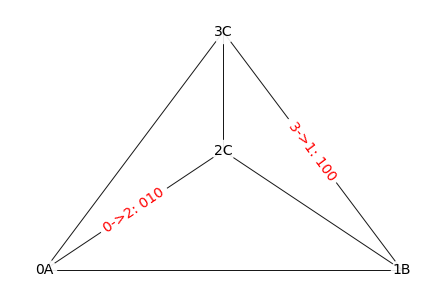

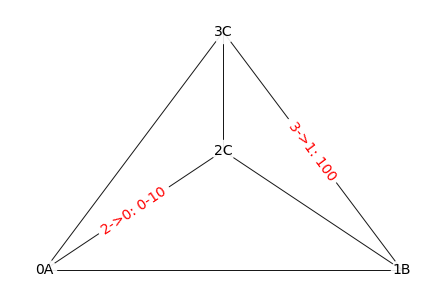

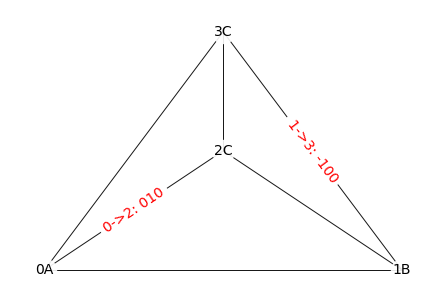

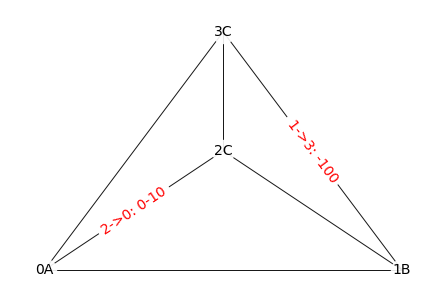

In [25]:
from cqgraph.qgraph import LQGeq
from cqgraph.utils import edge_hash
for i, lqg in enumerate(LQGeq.generator_label_and_direction(lqg1)):
    lqg.draw(i, positions=lqg1_positions)
    print(lqg1 == lqg, edge_hash(lqg1.nxg) == edge_hash(lqg.nxg))  # identity operation for i=0

Equivalence can also come from changing the coordination system (Fig 3c).
This, theoretically, can yield infinite equivalent LQGs.

True False


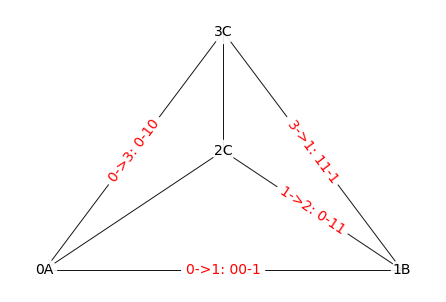

In [26]:
import itertools
allowed_origin_shifts = tuple(itertools.product(range(0, 2), repeat=3))
for i, lqg in enumerate(LQGeq.generator_coordination_system(lqg1, allowed_origin_shifts)):
    if i==42:
        print(lqg1 == lqg, edge_hash(lqg.nxg) == edge_hash(lqg1.nxg))
        LQG.draw(lqg, i, lqg1_positions)
        break

Finally, we have equivalence from permutations.

{0: 1, 1: 2, 2: 3, 3: 0}
True


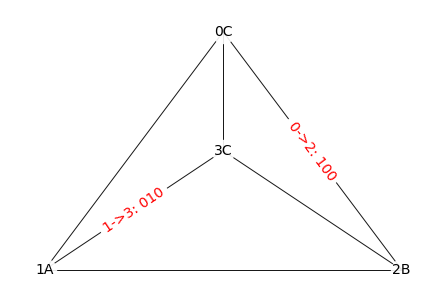

In [27]:
permutations = list(itertools.permutations(lqg1.nxg.nodes, len(lqg1.nxg.nodes)))
for i, p in enumerate(permutations):
    if i == 9:
        p = dict(zip(lqg1.nxg.nodes, p))
        permuted = LQGeq.permutation(lqg1, p)
        print(p)
        permuted.draw(i, lqg1_positions)
        print(lqg1 == permuted)

We can also create `LQG` from a `cif`, using neighbor finding algorithm implemented in `pymatgen`.

(<Figure size 432x288 with 1 Axes>, None)

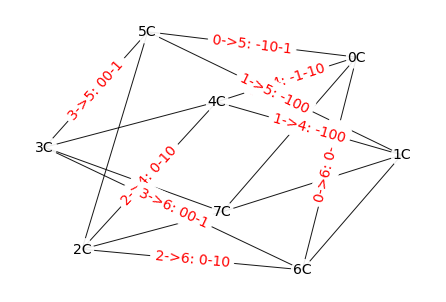

In [31]:
from pymatgen.core.structure import Structure
dia = Structure.from_file("dia.cif")
lqg = LQG.from_structure(dia)
lqg.draw("dia")

It was a graph of 8 nodes as the cubic unit cell contains 8 atoms. We can also start from a primitive cell.

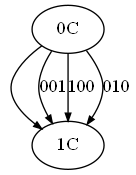

In [29]:
dia = Structure.from_file("dia_p.cif")
lqg = LQG.from_structure(dia)
lqg.draw_graphviz(ipython=True)  # use graphviz for parallel edges